__<span style="font-size: 40px;">Capstone Project</span>__ 

__<span style="font-size: 40px;">Auraly</span>__

---


__<font size="6">1. Business Understanding</font>__   

---

***<span style="font-size: 24px;">1.1 Overview</span>***

Music consumption today is highly personalized, with streaming platforms offering tailored recommendations based on listening habits. However, when it comes to emotional resonance, listeners still spend significant time manually curating playlists that match how they feel in the moment.
The traditional approach of browsing by genre or artist fail to capture the subtle emotional layers that make a song resonate. This project will make discovering music more personalized and enjoyable for casual listeners, DJs, and streaming 
platform users.  


***<span style="font-size: 24px;">1.2 Stakeholder</span>*** 

1. *Music Listeners* – benefit from effortless mood based playlist creation and more emotionally resonant music discovery.
2. *Streaming Platforms* – gain deeper user engagement and personalization features that differentiate their service.
3. *DJs & Curators* – save time curating emotionally aligned sets for events or audiences.


***<span style="font-size: 24px;">1.3 Problem Statement</span>*** 

Even though music apps offer personalized recommendations, they still don’t understand how a listener feels. People often spend too much time searching for songs that match their mood because most platforms sort music by genre or artist, not emotion. This makes it hard to find the right songs quickly, and limits how personal and meaningful the listening experience can be.


***<span style="font-size: 24px;">1.4 Business Objective</span>*** 

To establish Auraly as an intelligent mood-based music classification system that enhances emotional connection and personalization in music streaming. By automating playlist creation through acoustic mood detection, Auraly aims to improve user engagement, simplify music curation, and unlock deeper, mood-driven discovery experiences across platforms.


***<span style="font-size: 24px;">1.5 Project Objectives</span>*** 

**Main Objective** 

To develop an intelligent music classification system that automatically identifies the emotional mood of songs using acoustic features, enabling more intuitive and personalized music experiences.

**Specific Objectives** 

1. *Enable automated mood based playlist generation* - Reduce manual curation time by dynamically grouping songs based on emotional tone.
2. *Support personalized music discovery* - Recommend songs that align with a listener’s current mood or emotional preferences.
3. *Enhance user engagement across music platforms* - Improve retention and satisfaction by offering emotionally resonant listening experiences tailored to individual users.


***<span style="font-size: 24px;">1.6 Research Questions</span>*** 

1. How accurately can acoustic features be used to classify the emotional mood of a song?
2. Does personalized mood-based music discovery lead to higher user engagement on streaming platforms?
3. How can mood based classification improve the way users discover and organize music?


***<span style="font-size: 24px;">1.7 Success Criteria</span>***

1. *Accurate Mood Classification* - The system achieves a high accuracy rate in classifying songs into predefined emotional categories based on acoustic features.
2. *Improved User Experience* - Users will report reduced time and effort in creating mood based playlists and express higher satisfaction with music recommendations through surveys or usability testing.
3. *Increased Engagement Metrics* - Streaming platforms or test environments will show measurable improvements in user engagement, e.g. longer listening sessions, more playlist saves, or higher interaction rates, when Auraly is integrated.

---

__<font size="6">2. Data Understanding</font>__ 

---

***<span style="font-size: 24px;">2.1 Importing Relevant Libraries</span>***

In [73]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re
from collections import Counter
import warnings
import contractions
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

***<span style="font-size: 24px;">2.2 Loading the Data</span>***

In [74]:
# Extracting and load the CSV
zip_path = "278k_labelled_uri.csv.zip"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

# Load the data
music_data = pd.read_csv('unzipped_folder/278k_labelled_uri.csv')

music_data.head(10)

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
5,5,5,166920.0,0.572,0.837,-7.876,0.0367,0.0197,0.000000,0.1630,0.627,100.343,2.198658e-07,1,spotify:track:41MOCUNOgWtaYBFUsGnpZ5
6,6,6,193133.0,0.725,0.687,-6.465,0.0596,0.6940,0.000369,0.2310,0.770,96.005,3.085956e-07,1,spotify:track:5JP1cMCDxX4k2gwfSgt8Lf
7,7,7,253000.0,0.675,0.547,-4.999,0.0481,0.1140,0.000080,0.0678,0.365,75.003,1.901186e-07,1,spotify:track:73xsMXuRNB3yqLeNc7NXBq
8,8,8,216187.0,0.516,0.692,-4.842,0.0279,0.0875,0.009300,0.0900,0.181,83.571,1.290549e-07,0,spotify:track:6TwrBbgTaB5gpl06YQoRKy
9,9,9,232333.0,0.548,0.509,-7.937,0.0288,0.2610,0.702000,0.0790,0.484,78.974,1.239600e-07,0,spotify:track:5SDEirHg6Y8fCYuKMnAaC5


***<span style="font-size: 24px;">2.3 Initial Exploration And EDA</span>***

*<span style="font-size: 22px;">2.3.2 Dataset summary</span>*

In [75]:
# Store original statistics for comparison
shape = music_data.shape[0]
duplicates = music_data.duplicated().sum()
missing = music_data.isnull().sum().sum()

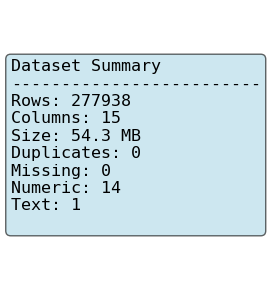

In [76]:
# Basic Dataset Info with plt only
info = f"""Dataset Summary
-------------------------
Rows: {len(music_data)}
Columns: {music_data.shape[1]}
Size: {music_data.memory_usage(deep=True).sum() / 1024**2:.1f} MB
Duplicates: {music_data.duplicated().sum()}
Missing: {music_data.isnull().sum().sum()}
Numeric: {music_data.select_dtypes(include='number').shape[1]}
Text: {music_data.select_dtypes(include='object').shape[1]}
"""

plt.figure(figsize=(2, 3))
plt.text(0.01, 0.5, info, fontsize=12, family='monospace',
         va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6))
plt.axis('off')
plt.tight_layout()
plt.show()


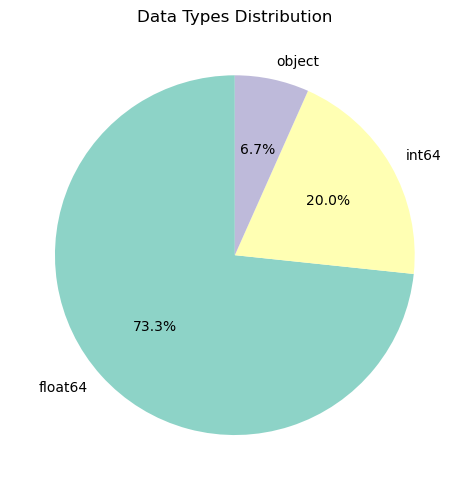

In [77]:
# Data Types Pie Chart 
types = music_data.dtypes.value_counts()
colors = plt.cm.Set3(range(len(types)))

plt.figure(figsize=(5, 5))
plt.pie(types.values, labels=types.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Data Types Distribution')
plt.tight_layout()
plt.show()

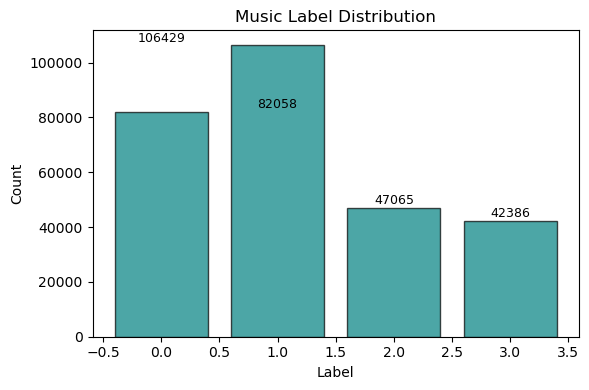

In [78]:
# Label Distribution 
counts = music_data['labels'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Music Label Distribution')

for i, v in enumerate(counts.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

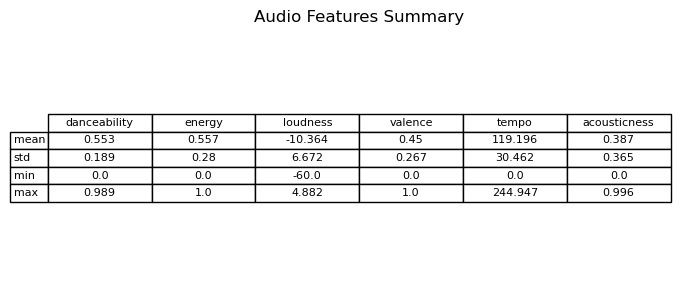

In [79]:
# Statistical Summary Table 
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'acousticness']
summary = music_data[features].describe().loc[['mean', 'std', 'min', 'max']].round(3)

plt.figure(figsize=(7, 3))
plt.axis('off')
plt.table(cellText=summary.values,
          rowLabels=summary.index,
          colLabels=summary.columns,
          cellLoc='center',
          loc='center')
plt.title('Audio Features Summary', fontsize=12, pad=10)
plt.tight_layout()
plt.show()


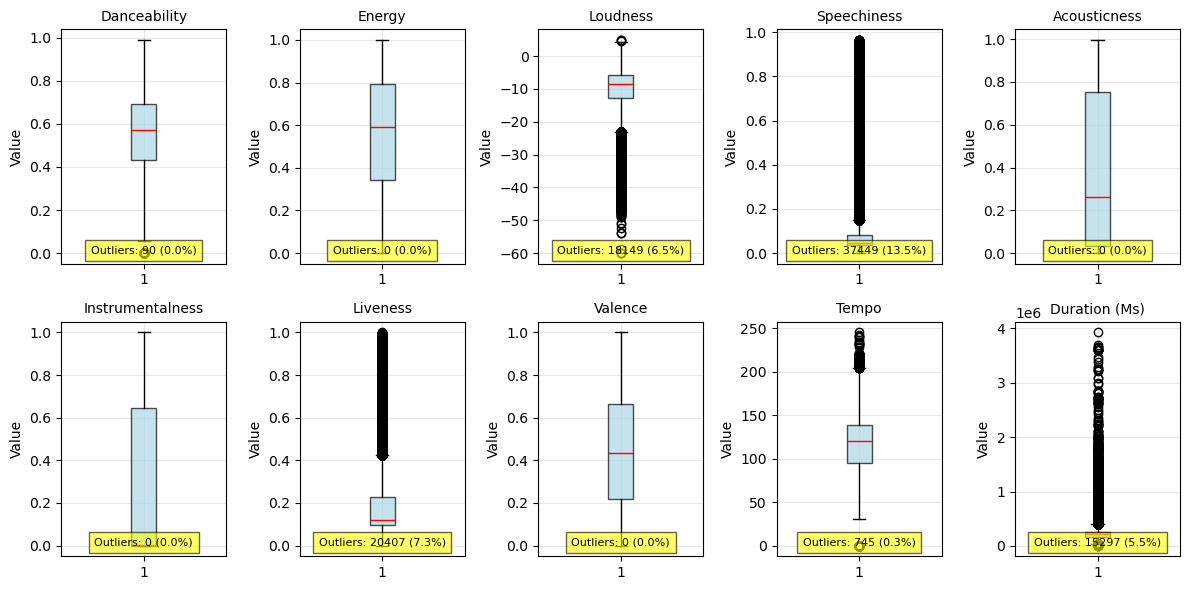

In [80]:
# Boxplots with Outlier Info 
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'duration (ms)']

plt.figure(figsize=(12, 6))

for i, feat in enumerate(features):
    if feat in music_data.columns:
        data = music_data[feat].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((data < lower) | (data > upper)).sum()
        pct = (outliers / len(data)) * 100

        plt.subplot(2, 5, i + 1)
        plt.boxplot(data, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red'))
        plt.title(feat.replace('_', ' ').title(), fontsize=10)
        plt.ylabel('Value')
        plt.text(1, min(data), f'Outliers: {outliers} ({pct:.1f}%)',
                 ha='center', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.6))
        plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


---

__<font size="6">3. Data Preparation</font>__ 

---

***<span style="font-size: 24px;">3.1 Data Cleaning</span>***

In [81]:
cleaning_log = {}

In [82]:
# Add mood names to labels 
moods = {
    0: 'Sad',
    1: 'Happy',
    2: 'Energetic',
    3: 'Calm'
}

music_data['mood'] = music_data['labels'].map(moods)

In [83]:
# Remove outliers using IQR
def remove_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

features = ['tempo', 'loudness', 'duration (ms)']
start_len = len(music_data)

for col in features:
    music_data = remove_outliers(music_data, col)

music_data.reset_index(drop=True, inplace=True)
cleaning_log['outliers_removed'] = start_len - len(music_data)

In [84]:
# Remove duplicates
music_data.drop_duplicates(inplace=True)
music_data.reset_index(drop=True, inplace=True)
cleaning_log['duplicates_removed'] = duplicates

In [85]:
# Filter to 10-20k samples for better performance and analysis
# Keep results consistent
np.random.seed(42)  

if len(music_data) > 15000:
    music_data = music_data.sample(n=15000, random_state=42).reset_index(drop=True)


In [86]:
# Fill missing values 
num_cols = music_data.select_dtypes(include='number').columns
cat_cols = music_data.select_dtypes(include='object').columns

for col in num_cols:
    if music_data[col].isnull().sum() > 0:
        music_data[col].fillna(music_data[col].median(), inplace=True)

for col in cat_cols:
    if music_data[col].isnull().sum() > 0:
        music_data[col].fillna(music_data[col].mode()[0], inplace=True)

missing = music_data.isnull().sum().sum()
cleaning_log['missing_values_filled'] = missing


In [87]:
# Convert duration to minutes
music_data['duration_min'] = music_data['duration (ms)'] / 60000

final_rows = len(music_data)
cleaning_log['final_records'] = final_rows
cleaning_log['total_removed'] = shape - final_rows
cleaning_log['removal_percentage'] = (cleaning_log['total_removed'] / shape) * 100


***<span style="font-size: 24px;">3.2 Cleaning Summary</span>***

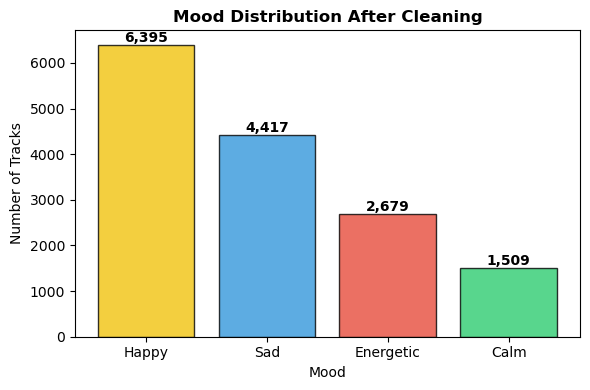

In [88]:
# Mood Distribution After Cleaning 
mood_counts = music_data['mood'].value_counts()
mood_colors = {'Sad': '#3498db', 'Happy': '#f1c40f', 'Energetic': '#e74c3c', 'Calm': '#2ecc71'}
colors = [mood_colors[mood] for mood in mood_counts.index]

plt.figure(figsize=(6, 4))
bars = plt.bar(mood_counts.index, mood_counts.values, color=colors, edgecolor='black', alpha=0.8)

plt.title('Mood Distribution After Cleaning', fontweight='bold')
plt.xlabel('Mood')
plt.ylabel('Number of Tracks')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

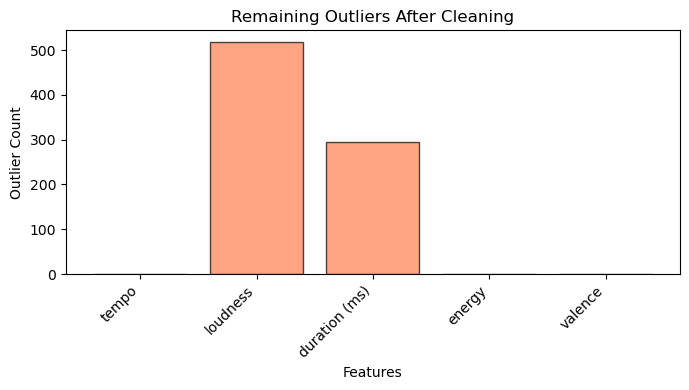

In [89]:
# Remaining Outliers After Cleaning 
features = ['tempo', 'loudness', 'duration (ms)', 'energy', 'valence']
outlier_counts = []

for col in features:
    q1 = music_data[col].quantile(0.25)
    q3 = music_data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outliers = ((music_data[col] < low) | (music_data[col] > high)).sum()
    outlier_counts.append(outliers)

plt.figure(figsize=(7, 4))
plt.bar(features, outlier_counts, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Outlier Count')
plt.title('Remaining Outliers After Cleaning')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


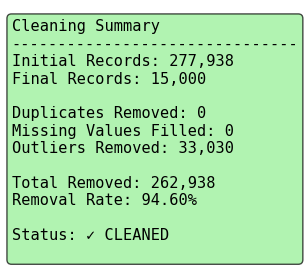

In [90]:
# Cleaning Summary 
summary = f"""Cleaning Summary
-------------------------------
Initial Records: {shape:,}
Final Records: {final_rows:,}

Duplicates Removed: {cleaning_log['duplicates_removed']:,}
Missing Values Filled: {cleaning_log['missing_values_filled']}
Outliers Removed: {cleaning_log['outliers_removed']:,}

Total Removed: {cleaning_log['total_removed']:,}
Removal Rate: {cleaning_log['removal_percentage']:.2f}%

Status: ✓ CLEANED
"""

plt.figure(figsize=(2, 3))
plt.text(0.05, 0.5, summary, fontsize=11, family='monospace',
         va='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.axis('off')
plt.tight_layout()
plt.show()


***<span style="font-size: 24px;"> Saving cleaned data</span>***

In [91]:
music_data.to_csv('cleaned_music_data.csv', index=False)

---

__<font size="6">4. Feature Distributions </font>__ 

---

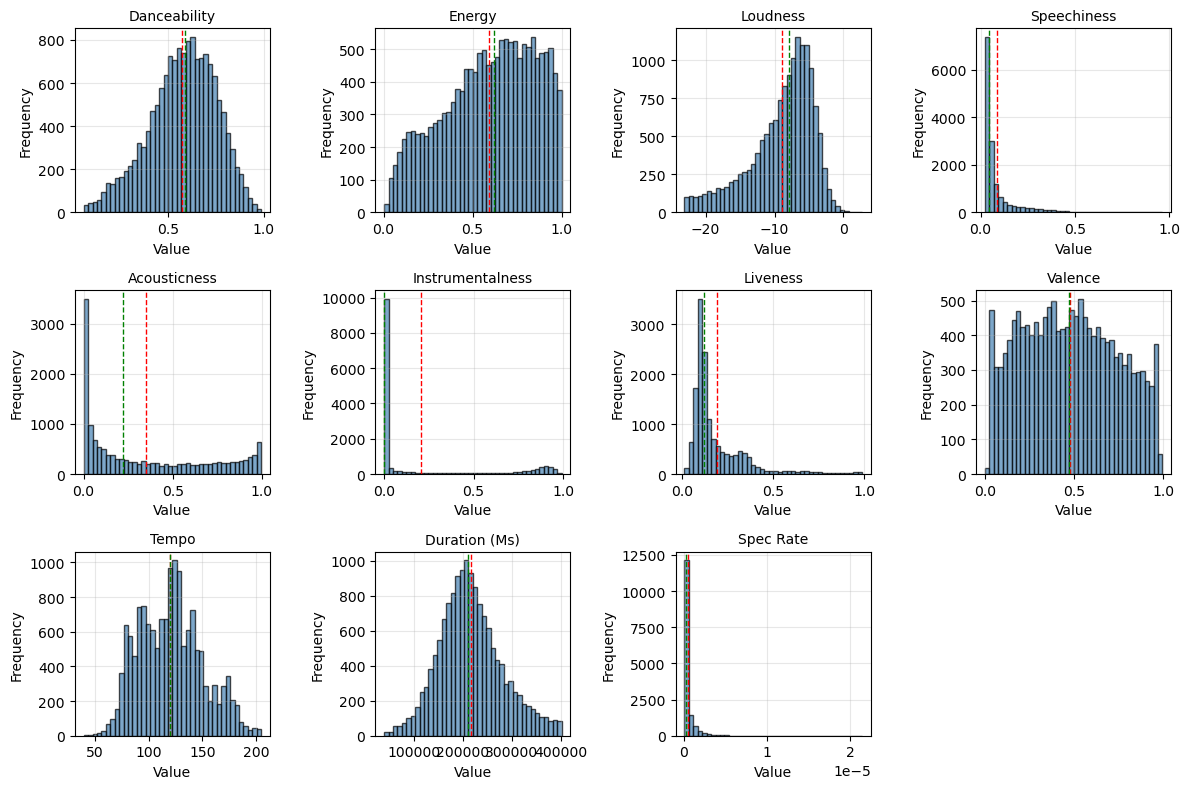

In [92]:
# Histograms of Audio Features
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo', 'duration (ms)', 'spec_rate']

plt.figure(figsize=(12, 8))

for i, feat in enumerate(features):
    if feat in music_data.columns:
        data = music_data[feat].dropna()
        plt.subplot(3, 4, i + 1)
        plt.hist(data, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
        plt.axvline(data.mean(), color='red', linestyle='--', linewidth=1)
        plt.axvline(data.median(), color='green', linestyle='--', linewidth=1)
        plt.title(feat.replace('_', ' ').title(), fontsize=10)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


***<span style="font-size: 24px;">4.1 Mood Feature Analysis</span>***

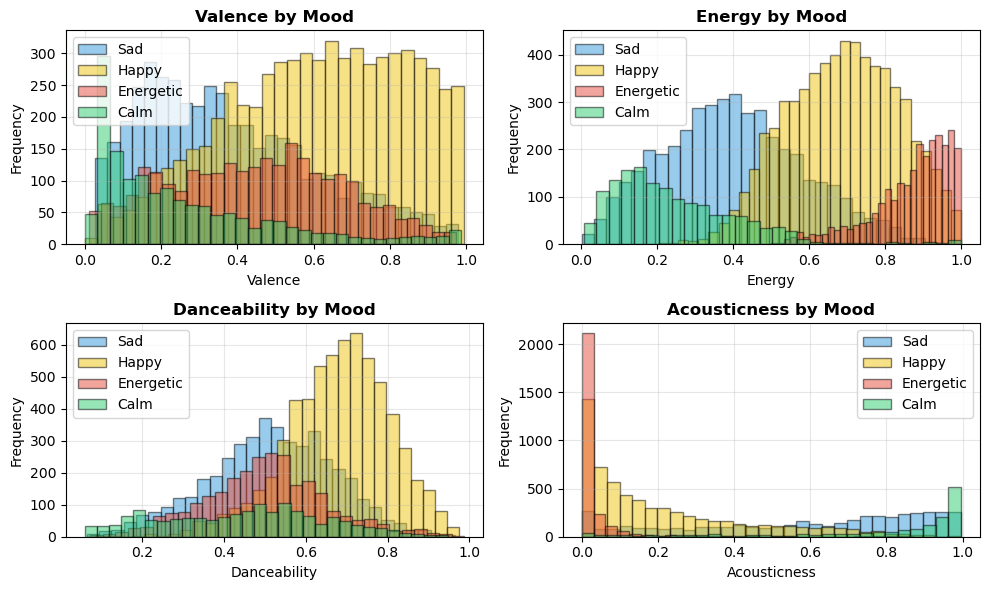

In [93]:
# Mood-Based Feature Distributions
features = ['valence', 'energy', 'danceability', 'acousticness']
colors = {'Sad': '#3498db', 'Happy': '#f1c40f', 'Energetic': '#e74c3c', 'Calm': '#2ecc71'}

plt.figure(figsize=(10, 6))
for i, feat in enumerate(features):
    plt.subplot(2, 2, i + 1)
    for mood in ['Sad', 'Happy', 'Energetic', 'Calm']:
        data = music_data[music_data['mood'] == mood][feat].dropna()
        plt.hist(data, bins=30, alpha=0.5, label=mood,
                 color=colors[mood], edgecolor='black')
    plt.title(f'{feat.capitalize()} by Mood', fontweight='bold')
    plt.xlabel(feat.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


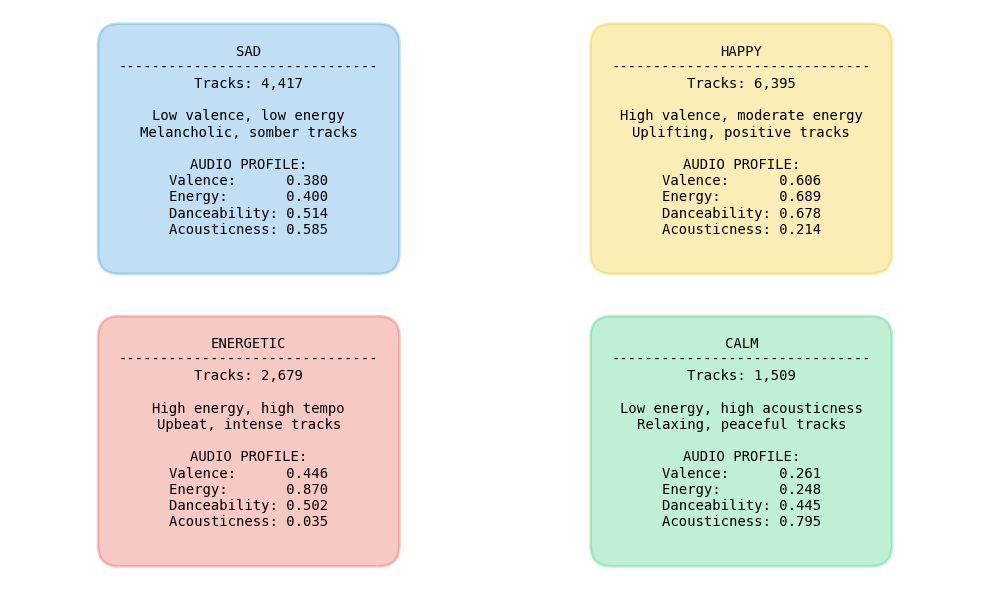

In [94]:
# Mood Cards
moods = {
    'Sad': {'color': '#3498db', 'desc': 'Low valence, low energy\nMelancholic, somber tracks'},
    'Happy': {'color': '#f1c40f', 'desc': 'High valence, moderate energy\nUplifting, positive tracks'},
    'Energetic': {'color': '#e74c3c', 'desc': 'High energy, high tempo\nUpbeat, intense tracks'},
    'Calm': {'color': '#2ecc71', 'desc': 'Low energy, high acousticness\nRelaxing, peaceful tracks'}
}

plt.figure(figsize=(10, 6))
for i, mood in enumerate(moods):
    data = music_data[music_data['mood'] == mood]
    val = data['valence'].mean()
    energy = data['energy'].mean()
    dance = data['danceability'].mean()
    acoustic = data['acousticness'].mean()
    count = len(data)

    card = f"""{mood.upper()}
-------------------------------
Tracks: {count:,}

{moods[mood]['desc']}

AUDIO PROFILE:
Valence:      {val:.3f}
Energy:       {energy:.3f}
Danceability: {dance:.3f}
Acousticness: {acoustic:.3f}
"""

    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.text(0.5, 0.5, card, fontsize=10, family='monospace',
             ha='center', va='center',
             bbox=dict(boxstyle='round,pad=1.5', facecolor=moods[mood]['color'],
                       alpha=0.3, edgecolor=moods[mood]['color'], linewidth=2))

plt.tight_layout()
plt.show()


---

__<font size="6">5.  Correlation Analysis </font>__ 

---

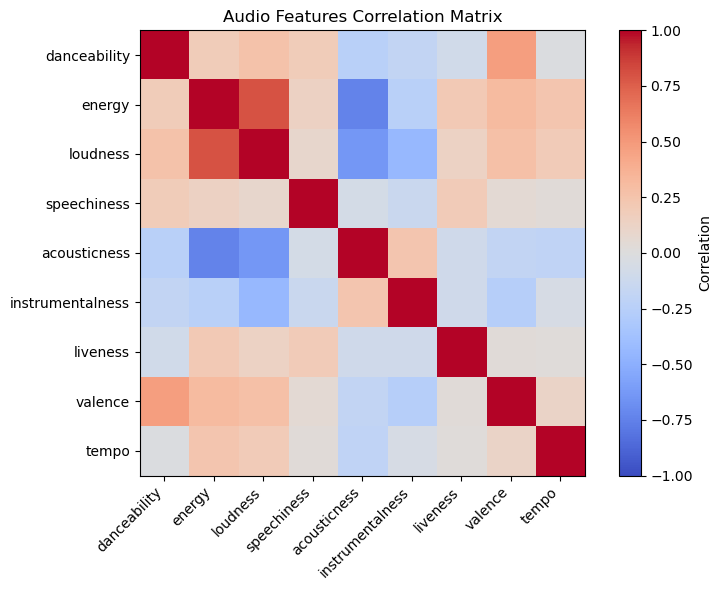

In [95]:
# Correlation Heatmap 
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo']
corr = music_data[features].corr().round(2)

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr.index)), labels=corr.index)
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
plt.show()


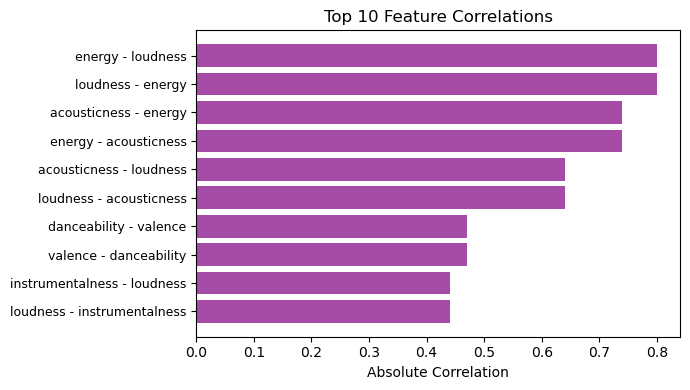

In [96]:
# Top 10 Feature Correlations 
pairs = corr.unstack()
top_corr = pairs[pairs < 1].abs().sort_values(ascending=False).head(10)

labels = [f'{a} - {b}' for a, b in top_corr.index]

plt.figure(figsize=(7, 4))
plt.barh(range(len(top_corr)), top_corr.values, color='purple', alpha=0.7)
plt.yticks(range(len(top_corr)), labels, fontsize=9)
plt.xlabel('Absolute Correlation')
plt.title('Top 10 Feature Correlations')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


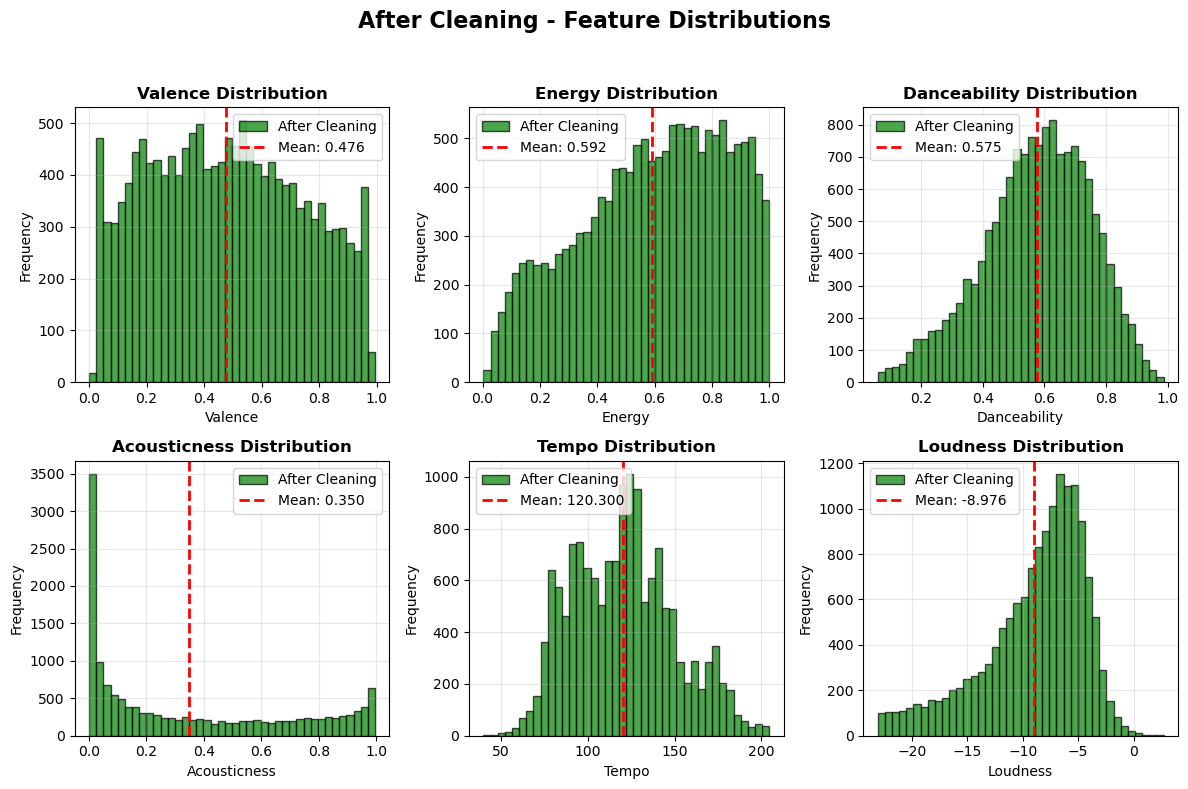

In [97]:
# Feature Distributions After Cleaning
features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'loudness']

plt.figure(figsize=(12, 8))
plt.suptitle('After Cleaning - Feature Distributions', fontsize=16, fontweight='bold')

for i, feat in enumerate(features):
    data = music_data[feat].dropna()
    plt.subplot(2, 3, i + 1)
    plt.hist(data, bins=40, color='green', edgecolor='black', alpha=0.7, label='After Cleaning')
    plt.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.3f}')
    plt.title(f'{feat.capitalize()} Distribution', fontweight='bold')
    plt.xlabel(feat.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

***<span style="font-size: 24px;"> Final Information Display</span>***

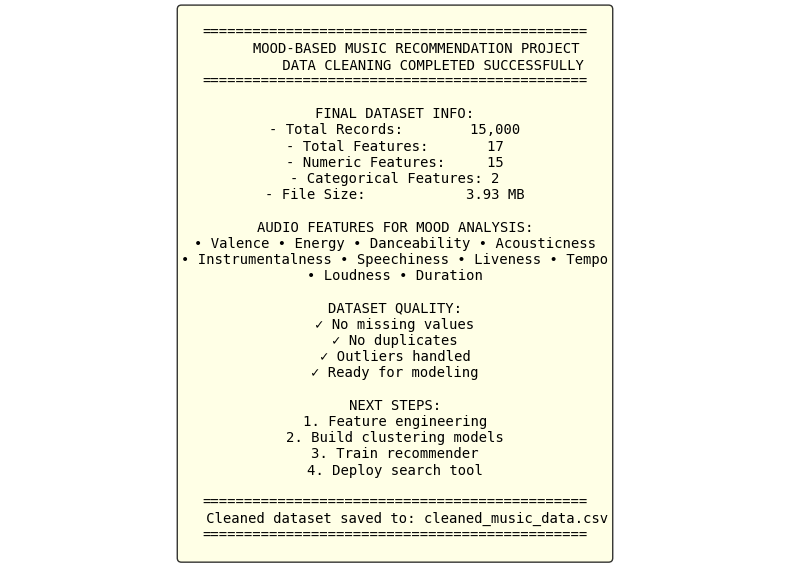

In [98]:
# Final Info Display 
info = f"""
==============================================
     MOOD-BASED MUSIC RECOMMENDATION PROJECT
         DATA CLEANING COMPLETED SUCCESSFULLY
==============================================

FINAL DATASET INFO:
- Total Records:        {music_data.shape[0]:,}
- Total Features:       {music_data.shape[1]}
- Numeric Features:     {len(music_data.select_dtypes(include='number').columns)}
- Categorical Features: {len(music_data.select_dtypes(include='object').columns)}
- File Size:            {music_data.memory_usage(deep=True).sum()/1024**2:.2f} MB

AUDIO FEATURES FOR MOOD ANALYSIS:
• Valence • Energy • Danceability • Acousticness
• Instrumentalness • Speechiness • Liveness • Tempo
• Loudness • Duration

DATASET QUALITY:
✓ No missing values
✓ No duplicates
✓ Outliers handled
✓ Ready for modeling

NEXT STEPS:
1. Feature engineering
2. Build clustering models
3. Train recommender
4. Deploy search tool

==============================================
   Cleaned dataset saved to: cleaned_music_data.csv
==============================================
"""

plt.figure(figsize=(8, 5))
plt.axis('off')
plt.text(0.5, 0.5, info, fontsize=10, family='monospace',
         ha='center', va='center', bbox=dict(boxstyle='round', 
         facecolor='lightyellow', alpha=0.8, edgecolor='black'))
plt.tight_layout()
plt.show()


---

__<font size="6">6. Modelling</font>__ 

---


---

__<font size="6">7. Evaluation</font>__ 

---